<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: María Jesús Valenzuela
- Nombre de alumno 2: Matías Zúñiga


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/jesuvalenzuela/NanSquad)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
from xgboost import plot_importance

In [19]:
ls

Lab7_enunciado.ipynb  diabetes_data.csv


In [20]:
df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [21]:
#Mini EDA
print(df.shape)
print(df.isna().sum().sum(), "missing total")
print(df['Diabetes'].value_counts(normalize=True))  # balance de clases
df.describe().T


(70692, 18)
0 missing total
Diabetes
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Age,70692.0,8.584055,2.852153,1.0,7.0,9.0,11.0,13.0
Sex,70692.0,0.456997,0.498151,0.0,0.0,0.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0
Veggies,70692.0,0.788774,0.408181,0.0,1.0,1.0,1.0,1.0


In [22]:
#Train-test split
y = df["Diabetes"].astype(int)
X = df.drop(columns=["Diabetes"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=1/3,
    stratify=y,
    random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47128, 17) (23564, 17) (47128,) (23564,)


In [23]:
#Column Transformer + Salida pandas
continuous_cols = ["BMI", "MentHlth", "PhysHlth"]  #variables continuas a escalar, para mantener la interpretabilidad

ct = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), continuous_cols),
    ],
    remainder="passthrough",      #variables binarias/ordinales sin transformar
    verbose_feature_names_out=False
).set_output(transform="pandas") 

In [24]:
#Pipeline + Train
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss",
)

pipe = Pipeline([
    ("prep", ct),
    ("xgb", xgb),
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['BMI', 'MentHlth',
                                                   'PhysHlth'])],
                                   verbose_feature_names_out=False)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.9, early_stopping_rounds=None,
                               enable_categorical=F...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=300,
                               n_jobs=-1, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [25]:
#Evaluación
y_pred  = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba)) 

              precision    recall  f1-score   support

           0     0.7770    0.7005    0.7368     11782
           1     0.7273    0.7990    0.7615     11782

    accuracy                         0.7497     23564
   macro avg     0.7522    0.7497    0.7491     23564
weighted avg     0.7522    0.7497    0.7491     23564

ROC-AUC: 0.8267352288350689


**¿Es acaso un buen predictor de diabetes?**

El modelo entrenado demuestra ser un buen predictor de diabetes, ya que alcanza un accuracy cercano a 0.75 y un ROC-AUC de 0.83, lo que indica una buena capacidad para distinguir entre pacientes con y sin la enfermedad. Además, el F1-score de 0.76 para la clase positiva refleja un equilibrio adecuado entre precisión y recall, lo que significa que el modelo logra identificar correctamente a la mayoría de los pacientes diabéticos sin generar un exceso de falsos positivos. En particular, el recall de 0.79 indica que el modelo detecta la mayoría de los casos reales de diabetes, mientras que la precisión de 0.73 muestra que la mayoría de las predicciones positivas son efectivamente correctas.

**¿Qué buscan explicar las métricas utilizadas?**

Las métricas utilizadas buscan explicar diferentes dimensiones del desempeño del modelo. La precisión evalúa la proporción de predicciones positivas que son correctas, es decir, mide la confiabilidad de las predicciones de “diabético”. La sensibilidad o recall mide la capacidad del modelo para identificar correctamente todos los casos positivos reales, siendo especialmente relevante en contextos médicos, donde es más grave dejar un paciente diabético sin detectar que clasificar erróneamente a un sano. El F1-score combina precisión y recall en una sola métrica equilibrada, penalizando los extremos donde una de las dos métricas sea baja. Finalmente, el ROC-AUC mide la capacidad global del modelo para separar ambas clases a lo largo de distintos umbrales de decisión, por lo que entrega una visión más completa del poder discriminativo del clasificador.

**¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?**

No necesariamente. Un buen desempeño en métricas como accuracy, F1 o ROC-AUC no garantiza que el modelo haya realizado una buena selección de características. Estas métricas solo evalúan la capacidad predictiva global, pero no indican si las variables utilizadas son realmente relevantes, estables o interpretables. Es posible obtener buenos resultados con características redundantes o con correlaciones espurias. Por ello, para evaluar la calidad y el aporte real de las variables se deben aplicar métodos de interpretabilidad, como la importancia de características de XGBoost, los gráficos de dependencia parcial (PDP) o los valores SHAP, que permiten identificar qué variables influyen más en la predicción.

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

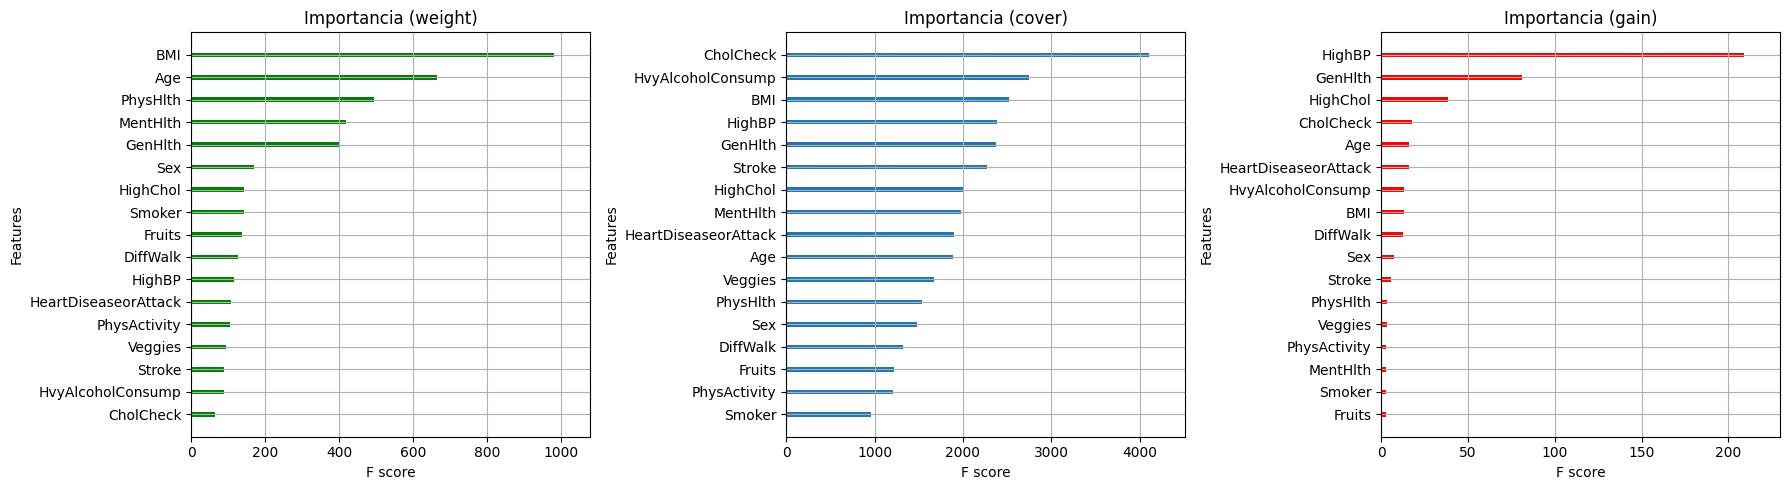

In [26]:
# === Punto 3 — Importancia de las features con XGBoost (weight, cover, gain) ===
# 1) Tomar el modelo entrenado desde el pipeline
xgb_fitted = pipe.named_steps["xgb"]

# 2) Graficar importancias con los tres métodos: weight, cover, gain
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_importance(xgb_fitted, importance_type="weight", ax=axes[0], color= "green" , title="Importancia (weight)", show_values=False)
plot_importance(xgb_fitted, importance_type="cover",  ax=axes[1], title="Importancia (cover)",  show_values=False)
plot_importance(xgb_fitted, importance_type="gain",   ax=axes[2], color= "red", title="Importancia (gain)",   show_values=False)

plt.tight_layout()
plt.show()

**¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados.**

Los resultados obtenidos con los distintos métodos de importancia no son exactamente iguales, aunque sí muestran cierta coherencia general. En los tres gráficos se repiten varias variables relevantes, como BMI, Age, PhysHlth y GenHlth, pero en diferente orden y con distinta magnitud. Esto ocurre porque cada tipo de importancia mide un aspecto diferente del uso de las variables dentro de los árboles. Weight contabiliza cuántas veces una variable se usa para dividir, cover mide cuántas muestras cubren esos nodos y gain evalúa la mejora promedio en la pérdida que genera cada split. Por lo tanto, las diferencias reflejan que algunas variables pueden ser utilizadas con frecuencia pero aportar poca ganancia informativa, mientras que otras, aunque se usen menos, generan divisiones mucho más efectivas. 

**¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?**

Las importancias obtenidas permiten una primera aproximación a la interpretabilidad del modelo, mostrando qué variables influyen más en las decisiones globales del clasificador. Sin embargo, este enfoque tiene limitaciones importantes. En primer lugar, no explica cómo una variable específica afecta la predicción en cada caso individual, ni muestra la dirección del efecto. Además, las métricas de importancia pueden ser sensibles a la escala de las variables y al grado de correlación entre ellas. Cuando dos variables están fuertemente relacionadas, el modelo puede repartir su importancia de forma arbitraria.

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

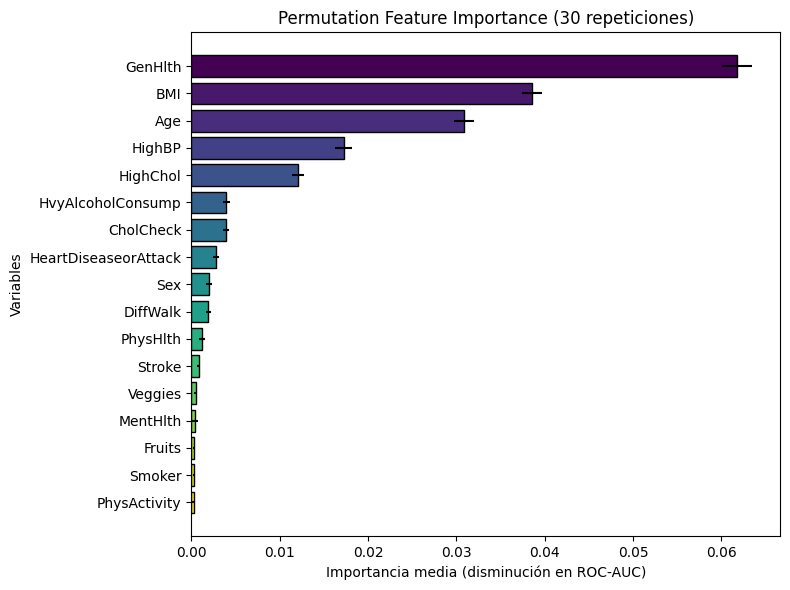

,feature,importance_mean,importance_std
11,GenHlth,0.061788,0.001677
4,BMI,0.038590,0.001106
0,Age,0.030887,0.001112
16,HighBP,0.017231,0.000945
2,HighChol,0.012082,0.000656
10,HvyAlcoholConsump,0.003951,0.000395
3,CholCheck,0.003895,0.000342
6,HeartDiseaseorAttack,0.002819,0.000357
1,Sex,0.001986,0.000303
14,DiffWalk,0.001935,0.000248


In [27]:
# === Punto 4 — Métodos Agnósticos Globales (Permutation Feature Importance) ===
# 1) Calcular importancias por permutación
r = permutation_importance(
    pipe, X_test, y_test,
    n_repeats=30,
    random_state=42,
    scoring="roc_auc",
    n_jobs=-1
)

# 2) Crear DataFrame ordenado
importances_df = (
    pd.DataFrame({
        "feature": X_test.columns,
        "importance_mean": r.importances_mean,
        "importance_std": r.importances_std
    })
    .sort_values("importance_mean", ascending=False)
)

# 3) Visualizar con colores distintos por barra
plt.figure(figsize=(8,6))

# Crear un color distinto para cada variable usando un colormap
colors = plt.colormaps['viridis'](np.linspace(0, 1, len(importances_df)))

plt.barh(
    importances_df["feature"],
    importances_df["importance_mean"],
    xerr=importances_df["importance_std"],
    color=colors,
    edgecolor="black"
)

plt.gca().invert_yaxis()
plt.title("Permutation Feature Importance (30 repeticiones)")
plt.xlabel("Importancia media (disminución en ROC-AUC)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# Mostrar tabla resumida
importances_df.head(10)


**¿Cómo mide la importancia de las features su propuesta?**

El método de permutación mide la importancia de una característica evaluando cuánto disminuye el rendimiento del modelo cuando se altera aleatoriamente esa variable, manteniendo el resto de los datos fijos. Si al permutar una feature el modelo pierde precisión (por ejemplo, baja el ROC-AUC), significa que dicha variable era relevante para las predicciones. En cambio, si el rendimiento casi no cambia, la feature tenía poca o nula contribución. En este caso, la métrica utilizada fue el área bajo la curva ROC, por lo que las importancias reflejan cuánto aporta cada variable al poder discriminativo del modelo.

**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido?**

Las variables con mayor impacto según el método de permutación fueron GenHlth, BMI, Age, HighBP y HighChol. Este resultado tiene un fuerte sentido clínico, ya que todas ellas se relacionan directamente con el riesgo de enfermedades metabólicas y cardiovasculares. La percepción de salud general (GenHlth) suele reflejar de forma indirecta el estado físico global y la presencia de comorbilidades. El índice de masa corporal (BMI) y la presión arterial alta (HighBP) son factores de riesgo bien establecidos para diabetes y enfermedades asociadas. La edad (Age) también es un predictor natural, dado que el riesgo aumenta con el envejecimiento. Finalmente, el colesterol alto (HighChol) contribuye a un perfil metabólico desfavorable.

**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

En comparación con el método de importancia basado en árboles (XGBoost), los resultados del método de permutación son más equilibrados y estables, reflejando mejor el impacto real de cada variable en la predicción. Mientras que el XGBoost tiende a sobrevalorar las variables con más divisiones o con alta cardinalidad, la permutación mide directamente el efecto sobre el desempeño global del modelo. Así, aunque las variables más importantes se mantienen (por ejemplo, BMI, Age y HighBP), las magnitudes relativas cambian: ahora se aprecia un orden de relevancia más realista y menos dependiente de la estructura interna del modelo.

**Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

Entre las principales ventajas del método de permutación se encuentran:

- Es un modelo agnóstico, es decir, puede aplicarse a cualquier tipo de modelo sin importar su estructura interna

- Proporciona una medida directa del impacto de cada variable sobre el desempeño, lo que facilita la interpretación global

- Permite cuantificar la estabilidad de las importancias mediante repeticiones y desviación estándar.

Sin embargo, también presenta desventajas importantes:

- Es computacionalmente costoso, ya que requiere múltiples evaluaciones del modelo
- Puede ser inestable con variables correlacionadas, ya que la permutación rompe las dependencias entre ellas y distorsiona su contribución real
- Sus resultados dependen del conjunto de test, por lo que distintos splits de datos pueden producir variaciones leves en las importancias.

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [28]:
!pip install shap

zsh:1: command not found: pip


In [29]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [30]:
# Inserte código para calcular shapley values aquí

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

In [31]:
# Inserte código para generar gráficos de aporte local aquí

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

In [32]:
# Inserte código para generar gráficos de aporte global aquí

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [33]:
# Inserte código para generar gráficos de feature vs shap value aquí

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [34]:
# Inserte código para generar gráficos PDP aquí

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [35]:
!pip install alibi

zsh:1: command not found: pip


In [36]:
from alibi.explainers import AnchorTabular

ModuleNotFoundError: No module named 'alibi'

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>